In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
from PIL import Image
import sklearn
import numpy as np
import matplotlib.pyplot as plt
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import seaborn as sns
# Pour dessiner des courbes
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel
%matplotlib inline

In [2]:
df_omnetpp=pd.read_csv('/home/jean/Work/simulations/projects/mosaic/set_data/dt_omnetpp/output.csv')

In [9]:
df_omnetpp.shape

(1048575, 5)

In [10]:
df_omnetpp.head(6)

,Cat_message,Time,MessageId,Id_veh,Type
0,V2X_MESSAGE_RECEPTION,2001020884,0,veh_1,Cam
1,V2X_MESSAGE_TRANSMISSION,2900000000,1,veh_1,Cam
2,V2X_MESSAGE_RECEPTION,2901187263,1,veh_0,Cam
3,V2X_MESSAGE_TRANSMISSION,3000000000,2,veh_0,Cam
4,V2X_MESSAGE_RECEPTION,3001074837,2,veh_1,Cam
5,V2X_MESSAGE_TRANSMISSION,3900000000,3,veh_1,Cam


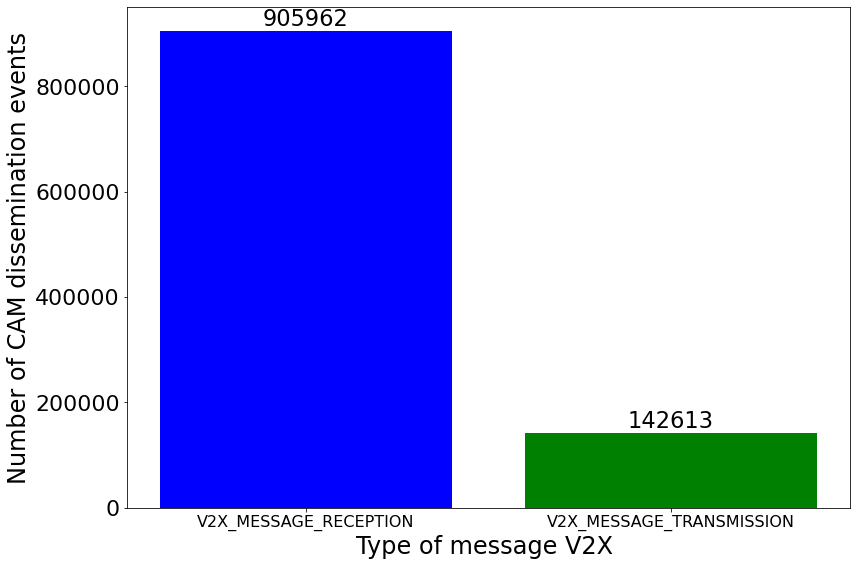

In [11]:
receptions = df_omnetpp[df_omnetpp['Cat_message'] == 'V2X_MESSAGE_RECEPTION']

transmissions = df_omnetpp[df_omnetpp['Cat_message'] == 'V2X_MESSAGE_TRANSMISSION']

nombre_receptions = len(receptions)
nombre_transmissions = len(transmissions)

plt.figure(figsize=(12, 8), facecolor='none')  
categories = ['V2X_MESSAGE_RECEPTION', 'V2X_MESSAGE_TRANSMISSION']
nombre_messages = [nombre_receptions, nombre_transmissions]

plt.bar(categories, nombre_messages, color=['blue', 'green'])

plt.xticks(fontsize=16)
plt.yticks(fontsize=22)

plt.xlabel("Type of message V2X ", fontsize=24)
plt.ylabel("Number of CAM dissemination events", fontsize=24)

for i, v in enumerate(nombre_messages):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=22.5)

plt.tight_layout()

plt.savefig('/home/jean/Work/jupyter/notebookenv/home/phdIA/data/data_omnetpp/img/histo_Sent_rec_packet_OMNETpp.png', format='png')


plt.show()


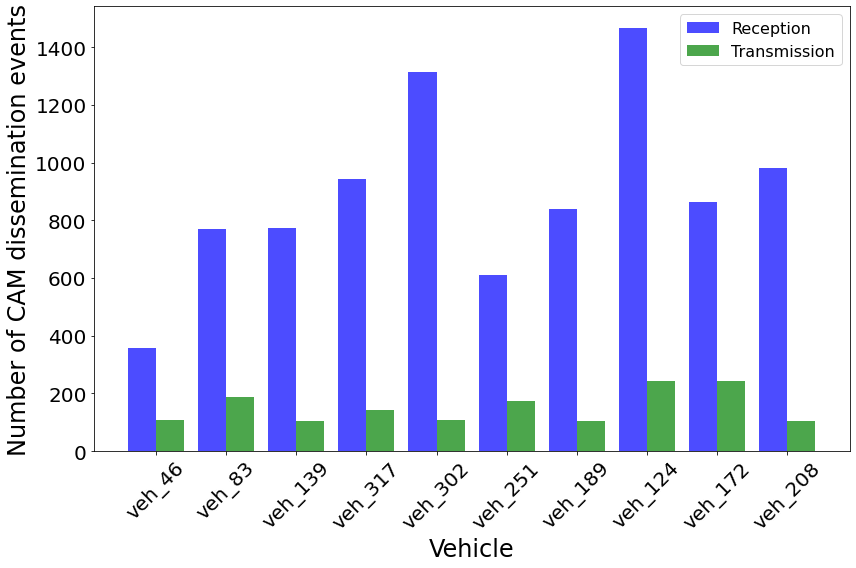

In [12]:

# Filtrer les données pour les réceptions (V2X_MESSAGE_RECEPTION)
receptions = df_omnetpp[df_omnetpp['Cat_message'] == 'V2X_MESSAGE_RECEPTION']

# Filtrer les données pour les transmissions (V2X_MESSAGE_TRANSMISSION)
transmissions = df_omnetpp[df_omnetpp['Cat_message'] == 'V2X_MESSAGE_TRANSMISSION']

# Sélectionner les véhicules spécifiques
vehicules_selectionnes = ['veh_46', 'veh_83', 'veh_139', 'veh_317', 'veh_302', 'veh_251', 'veh_189', 'veh_124', 'veh_172', 'veh_208']

# Initialiser des listes pour stocker le nombre de messages de réception et de transmission pour chaque véhicule
nombre_receptions = []
nombre_transmissions = []

# Compter le nombre de messages de réception et de transmission pour chaque véhicule
for vehicule in vehicules_selectionnes:
    receptions_vehicule = len(receptions[receptions['Id_veh'] == vehicule])
    transmissions_vehicule = len(transmissions[transmissions['Id_veh'] == vehicule])
    
    nombre_receptions.append(receptions_vehicule)
    nombre_transmissions.append(transmissions_vehicule)

# Créer un histogramme
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(vehicules_selectionnes))

plt.bar(index, nombre_receptions, bar_width, label='Reception', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], nombre_transmissions, bar_width, label='Transmission', color='green', alpha=0.7)
# Agrandir la police de l'axe des x et de l'axe des y
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Définir des étiquettes pour les axes et un titre
plt.xlabel("Vehicle",fontsize=24)
plt.ylabel("Number of CAM dissemination events",fontsize=24)
#plt.title("Number of V2X Communication Events")

# Ajouter une légende pour les courbes
plt.legend(fontsize=16)

# Personnaliser les étiquettes des axes x avec les noms des véhicules
plt.xticks([i + bar_width/2 for i in index], vehicules_selectionnes,rotation=45)

# Afficher le graphique
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exporter le graphique au format PNG (ou tout autre format de votre choix)
plt.savefig('/home/jean/Work/jupyter/notebookenv/home/phdIA/data/data_omnetpp/img/histo_10vehOMNETpp.png', format='png')
plt.show()